# DATA COLLECTION AND INITIAL INSPECTION

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score as r2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('USA_Housing.csv')
df = data.copy()

In [4]:
pd.options.display.float_format = '{:.6f}'.format
pd.set_option('display.max_columns', None)

In [5]:
df.drop('Address', axis = 1, inplace = True)

In [6]:
df.head()

Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0      79545.458574             5.682861                   7.009188   
1      79248.642455             6.002900                   6.730821   
2      61287.067179             5.865890                   8.512727   
3      63345.240046             7.188236                   5.586729   
4      59982.197226             5.040555                   7.839388   

   Avg. Area Number of Bedrooms  Area Population          Price  
0                      4.090000     23086.800503 1059033.557870  
1                      3.090000     40173.072174 1505890.914847  
2                      5.130000     36882.159400 1058987.987876  
3                      3.260000     34310.242831 1260616.806629  
4                      4.230000     26354.109472  630943.489339

# DATA CLEANING

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
dtypes: float64(6)
memory usage: 234.5 KB


In [8]:
df.isnull().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
dtype: int64

# EXPLORATORY DATA ANALYSIS (EDA)

In [9]:
df.describe()

Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
count       5000.000000          5000.000000                5000.000000   
mean       68583.108984             5.977222                   6.987792   
std        10657.991214             0.991456                   1.005833   
min        17796.631190             2.644304                   3.236194   
25%        61480.562388             5.322283                   6.299250   
50%        68804.286404             5.970429                   7.002902   
75%        75783.338666             6.650808                   7.665871   
max       107701.748378             9.519088                  10.759588   

       Avg. Area Number of Bedrooms  Area Population          Price  
count                   5000.000000      5000.000000    5000.000000  
mean                       3.981330     36163.516039 1232072.654142  
std                        1.234137      9925.650114  353117.626581  
min                        2.000000       172.610686   15938.657923  
25%                        3.140000     29403.928702  997577.135049  
50%                        4.050000     36199.406689 1232669.377966  
75%                        4.490000     42861.290769 1471210.204212  
max                        6.500000     69621.713378 2469065.594175

In [10]:
# %pip install pandas-profiling

In [11]:
import pandas_profiling as pp

In [12]:
df.profile_report(title = 'USA Housing Data Report')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [13]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price'],
      dtype='object')

In [14]:
df.dtypes

Avg. Area Income                float64
Avg. Area House Age             float64
Avg. Area Number of Rooms       float64
Avg. Area Number of Bedrooms    float64
Area Population                 float64
Price                           float64
dtype: object

<h3> UNIVARIATE ANALYSIS </h3>

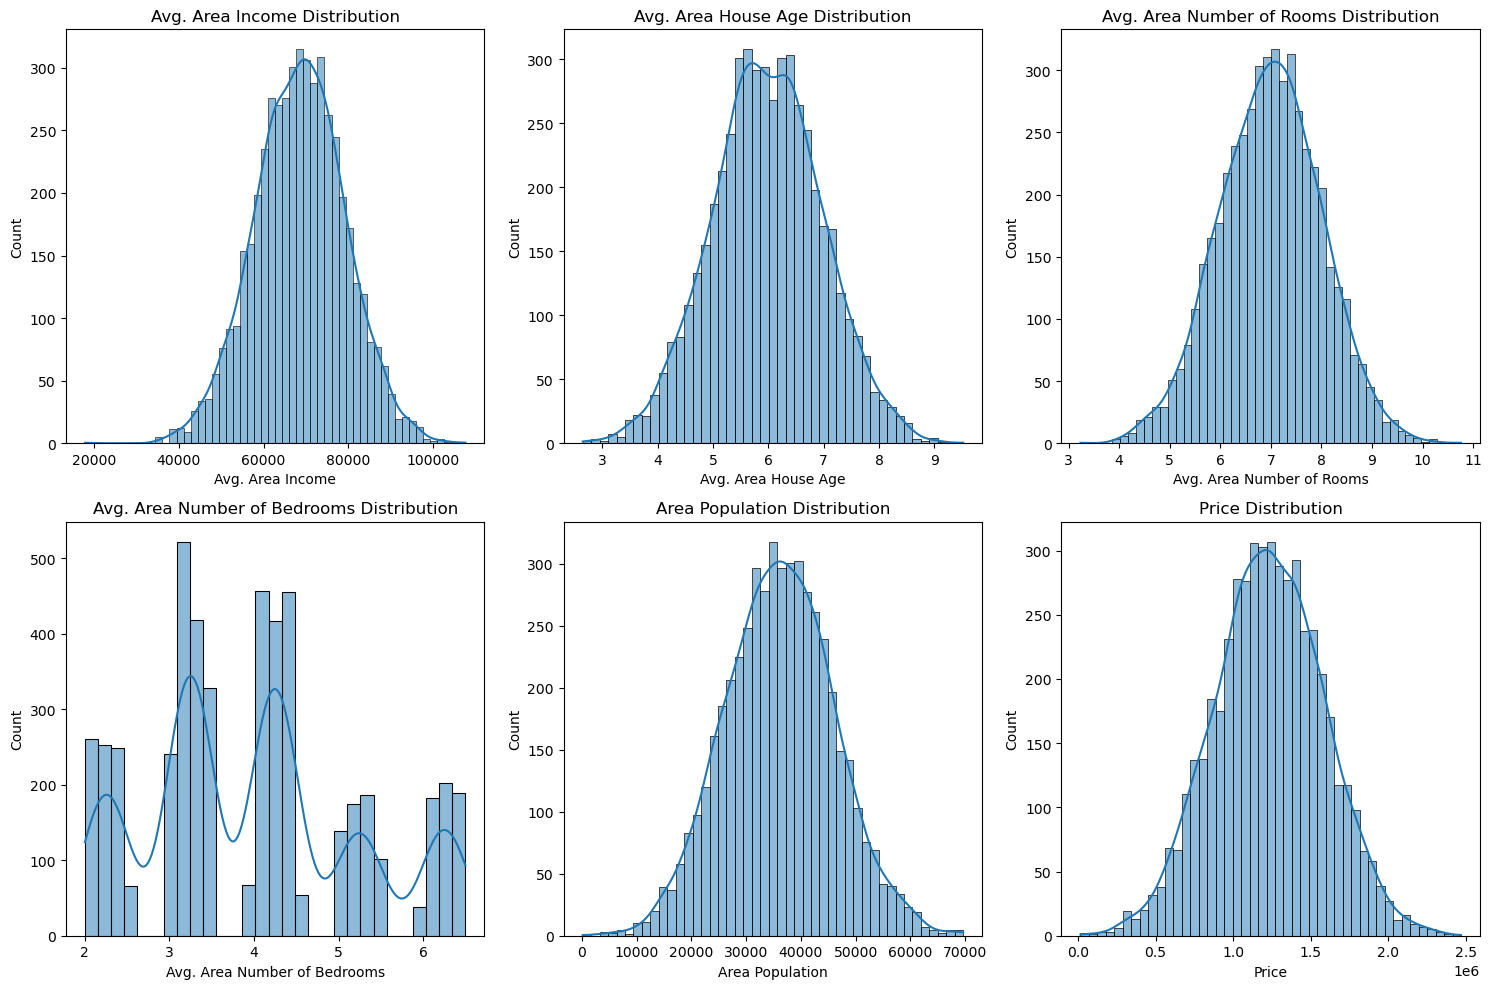

In [15]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
sns.histplot(df['Avg. Area Income'], kde=True)
plt.title('Avg. Area Income Distribution')

plt.subplot(2, 3, 2)
sns.histplot(df['Avg. Area House Age'], kde=True)
plt.title('Avg. Area House Age Distribution')

plt.subplot(2, 3, 3)
sns.histplot(df['Avg. Area Number of Rooms'], kde=True)
plt.title('Avg. Area Number of Rooms Distribution')

plt.subplot(2, 3, 4)
sns.histplot(df['Avg. Area Number of Bedrooms'], kde=True)
plt.title('Avg. Area Number of Bedrooms Distribution')

plt.subplot(2, 3, 5)
sns.histplot(df['Area Population'], kde=True)
plt.title('Area Population Distribution')

plt.subplot(2, 3, 6)
sns.histplot(df['Price'], kde=True)
plt.title('Price Distribution')

plt.tight_layout()
plt.show()


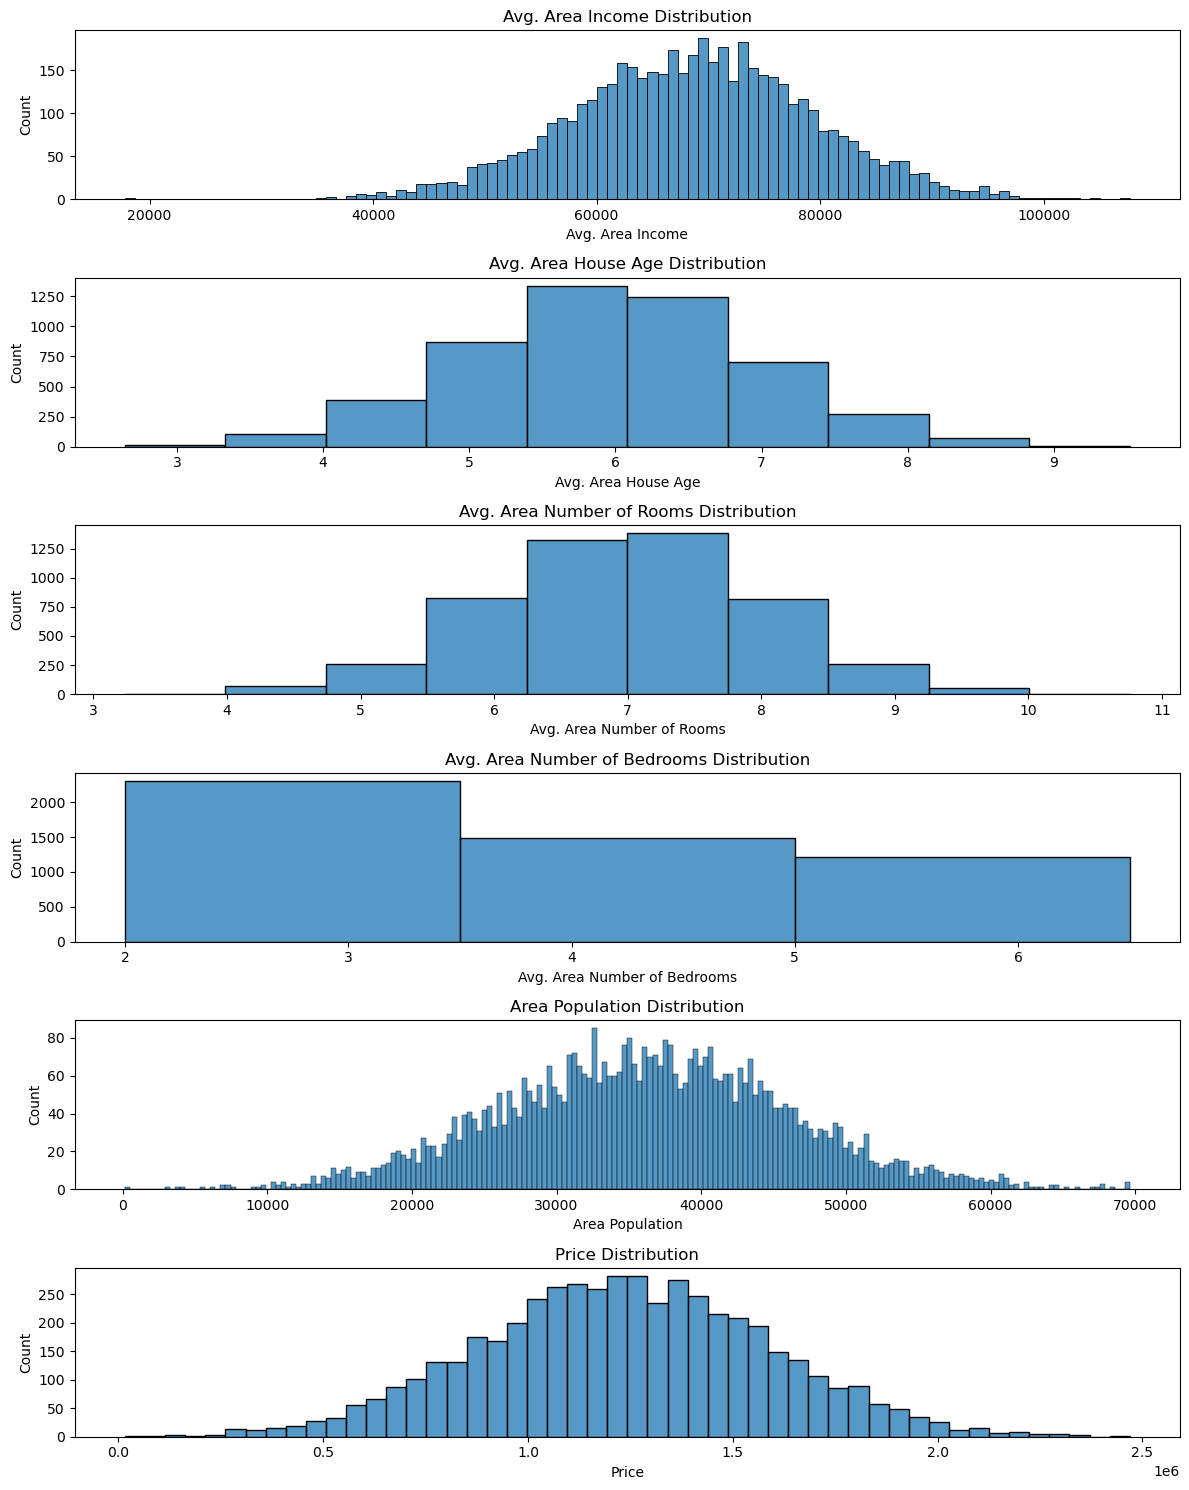

In [16]:
plt.figure(figsize=(12, 15))

plt.subplot(6,1,1)
sns.histplot(df['Avg. Area Income'], bins = 100)
plt.title('Avg. Area Income Distribution')

plt.subplot(6,1,2)
sns.histplot(df['Avg. Area House Age'], bins = 10)
plt.title('Avg. Area House Age Distribution')

plt.subplot(6,1,3)
sns.histplot(df['Avg. Area Number of Rooms'], bins = 10)
plt.title('Avg. Area Number of Rooms Distribution')

plt.subplot(6,1,4)
sns.histplot(df['Avg. Area Number of Bedrooms'], bins = 3)
plt.title('Avg. Area Number of Bedrooms Distribution')

plt.subplot(6,1,5)
sns.histplot(df['Area Population'], bins = 200)
plt.title('Area Population Distribution')

plt.subplot(6,1,6)
sns.histplot(df['Price'], bins = 50)
plt.title('Price Distribution')

plt.tight_layout()
plt.show()

<H3> MULTIVARIATE ANALYSIS </H3>

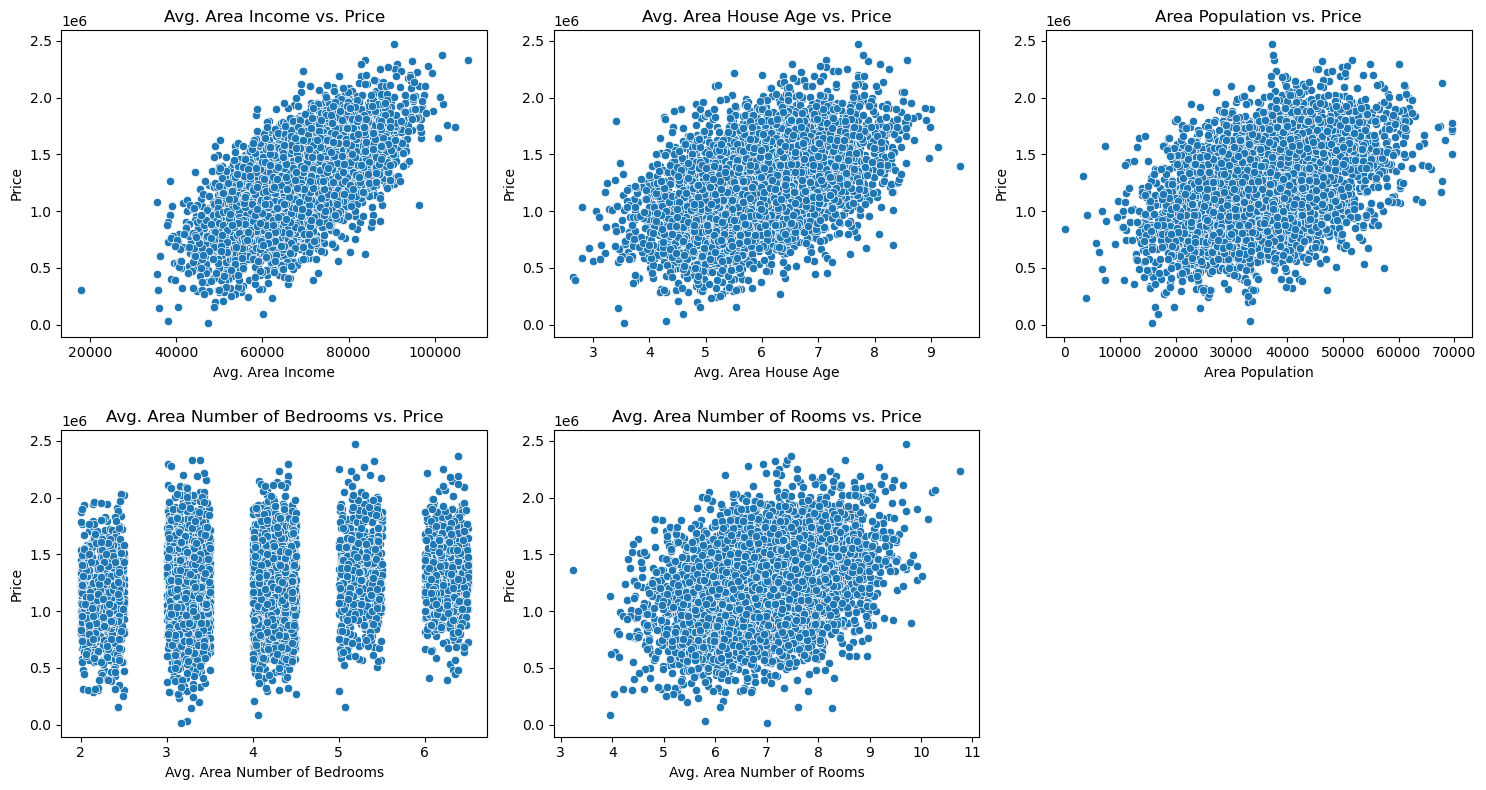

In [17]:
plt.figure(figsize=(15, 8))

plt.subplot(2, 3, 1)
sns.scatterplot(x='Avg. Area Income', y='Price', data=df)
plt.title('Avg. Area Income vs. Price')

plt.subplot(2, 3, 2)
sns.scatterplot(x='Avg. Area House Age', y='Price', data=df)
plt.title('Avg. Area House Age vs. Price')

plt.subplot(2, 3, 3)
sns.scatterplot(x='Area Population', y='Price', data=df)
plt.title('Area Population vs. Price')

plt.subplot(2, 3, 4)
sns.scatterplot(x='Avg. Area Number of Bedrooms', y='Price', data=df)
plt.title('Avg. Area Number of Bedrooms vs. Price')

plt.subplot(2,3,5)
sns.scatterplot(x = 'Avg. Area Number of Rooms', y = 'Price', data=df)
plt.title('Avg. Area Number of Rooms vs. Price')


plt.tight_layout()
plt.show()


<h3> MULTIVARIATE ANALYSIS </h3>

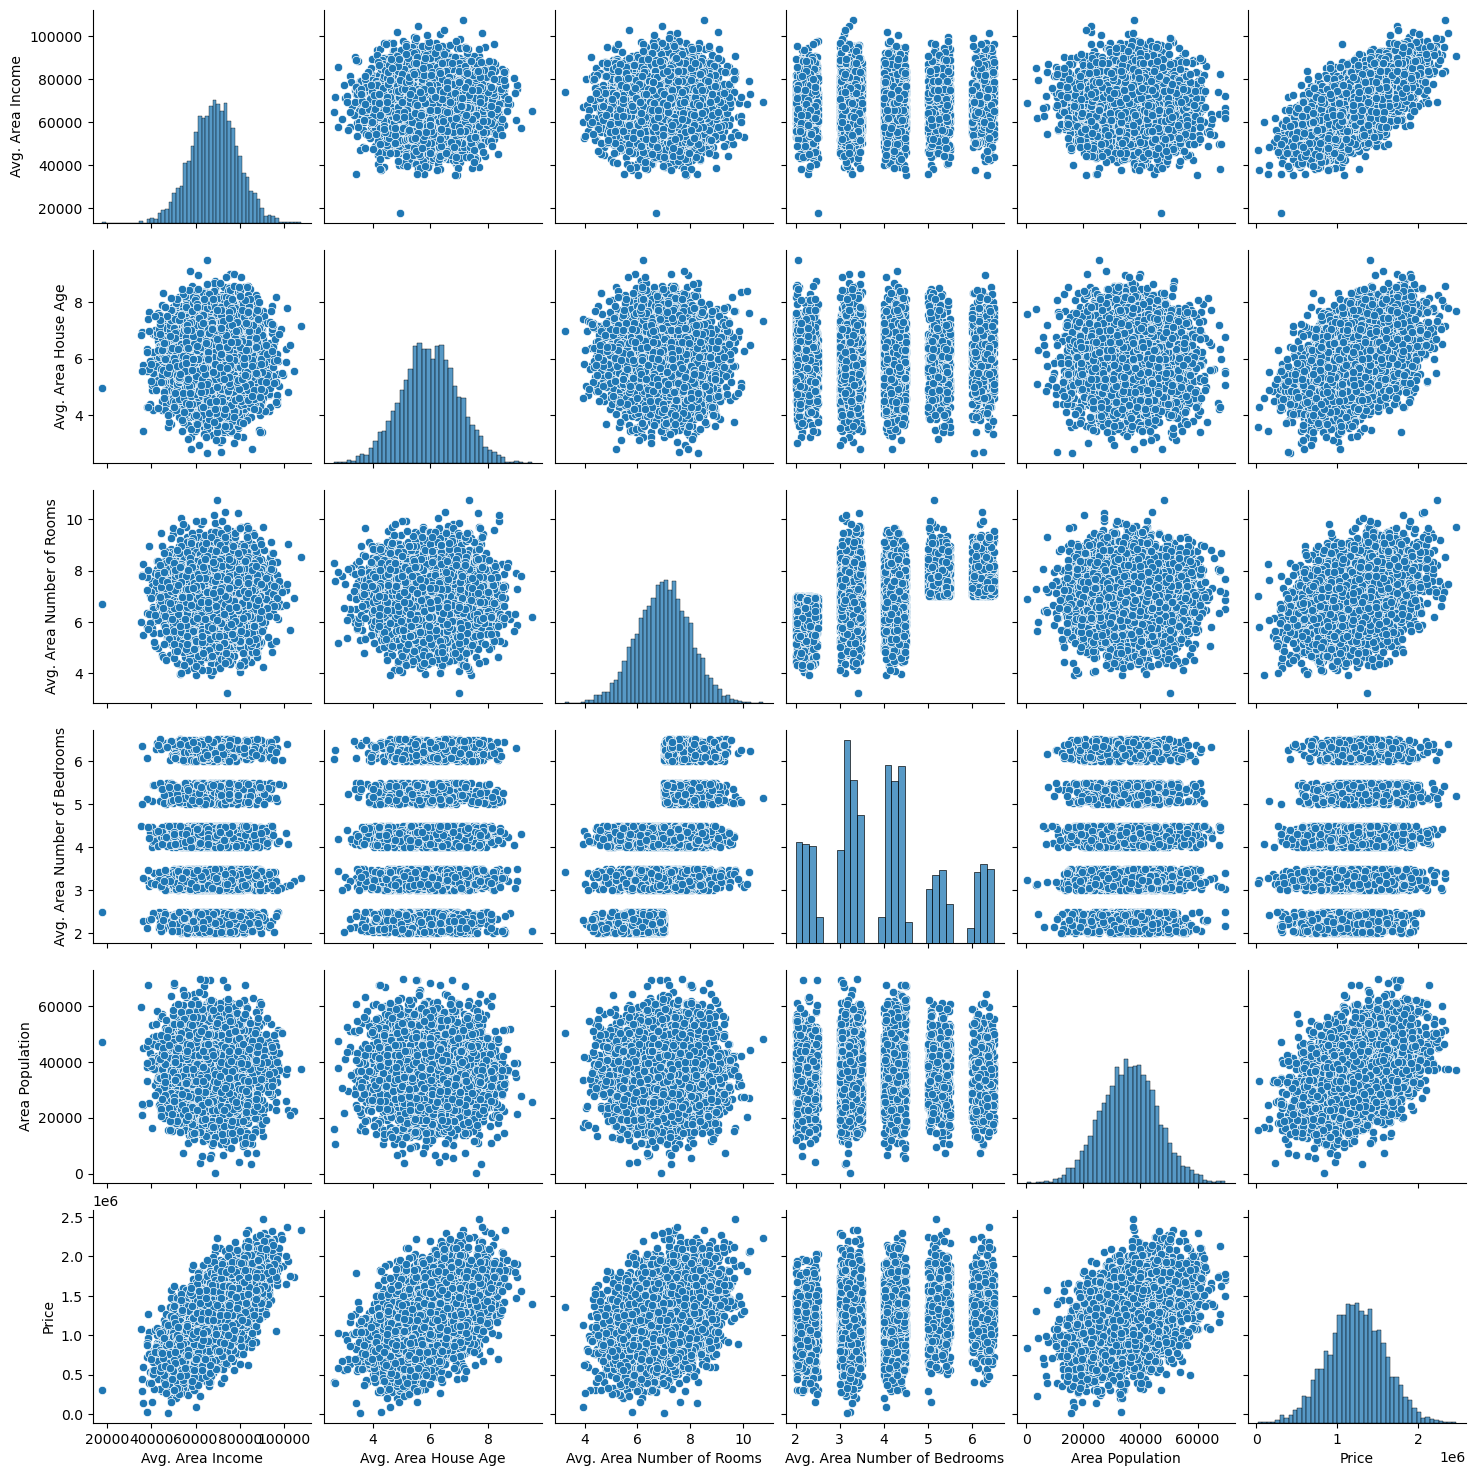

In [18]:
sns.pairplot(df)
plt.show()

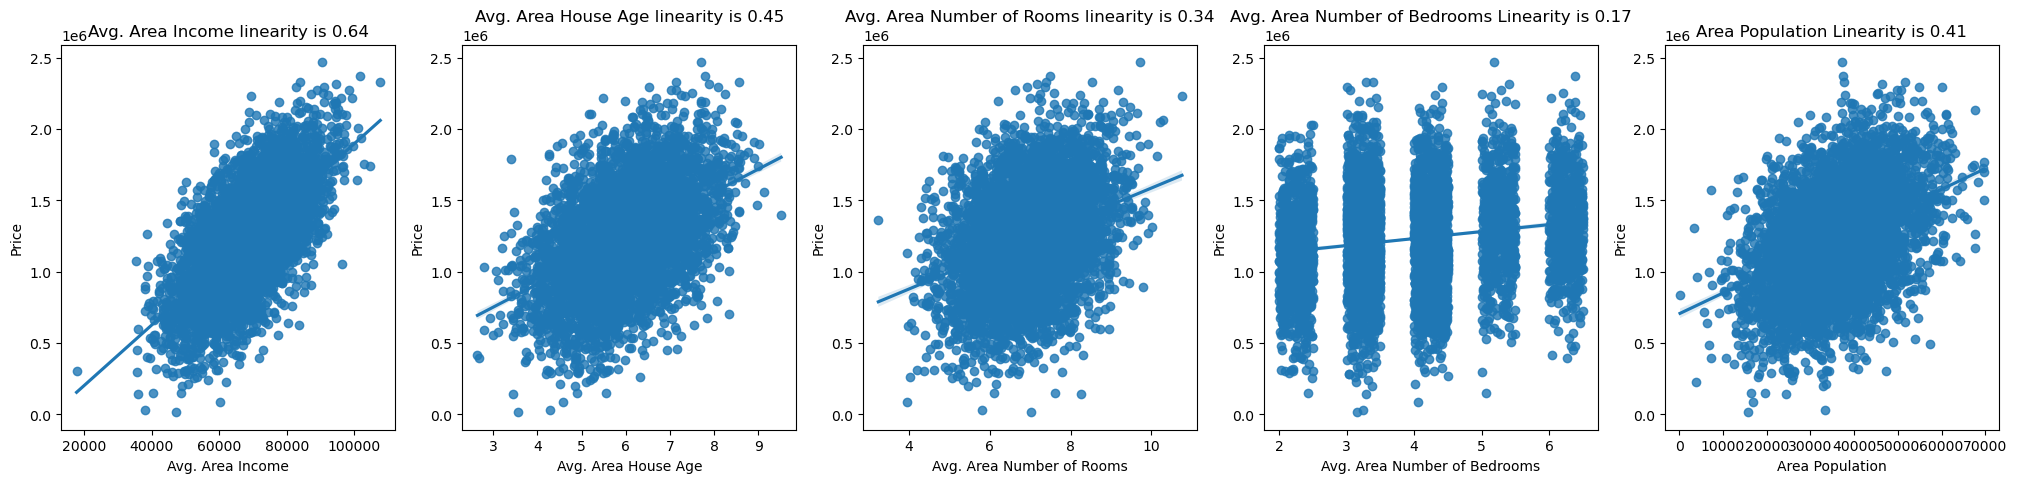

In [19]:
#..........CHECK FOR LINEARITY
def linearcheck (dataframe, a, b , c, d, e, f):
    plt.figure(figsize = (25, 5))
    
    plt.subplot(1,5,1)
    sns.regplot(x = dataframe[a], y = dataframe[f], ci = 0)
    plt.title(f"{a} linearity is {df[a].corr(dataframe[f]) :.2f}")
    
    plt.subplot(1,5,2)
    sns.regplot(x = dataframe[b], y = dataframe[f])
    plt.title(f"{b} linearity is {df[b].corr(dataframe[f]) :.2f}")
    
    plt.subplot(1,5,3)
    sns.regplot(x = dataframe[c], y = dataframe[f])
    plt.title(f"{c} linearity is {df[c].corr(dataframe[f]) :.2f}")
    
    plt.subplot(1,5,4)
    sns.regplot(x = dataframe[d], y = dataframe[f])
    plt.title(f"{d} Linearity is {dataframe[d].corr(dataframe[f]):.2f}")
    
    plt.subplot(1,5,5)
    sns.regplot(x = dataframe[e], y = dataframe[f])
    plt.title(f"{e} Linearity is {dataframe[e].corr(dataframe[f]) :.2f}")
    
linearcheck(df, 'Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price')

In [20]:
# #...........NORMALIZATION
# no_price = df.drop('Price', axis = 1)
# normalize = MinMaxScaler()
# for i in df.columns:
#     if i in no_price:
#         df[i] = normalize.fit_transform(df[[i]])

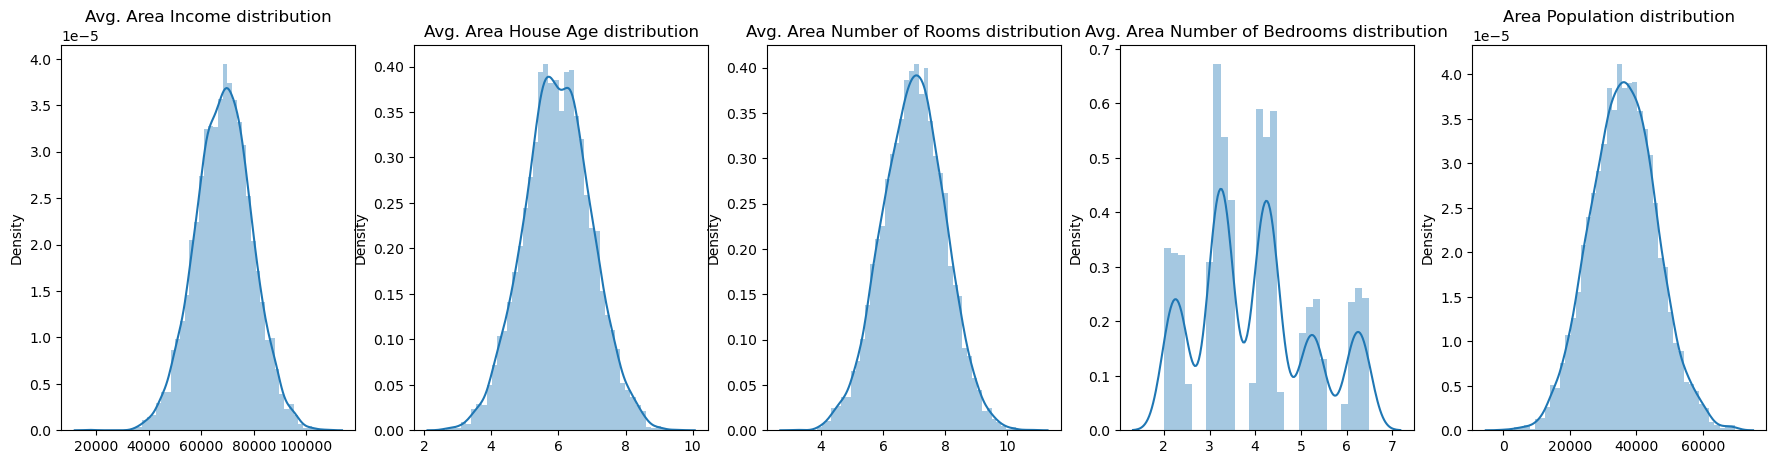

In [21]:
#......CHECK IF NORMALLY DISTRIBUTED
def normalityChecker(dataframe, a,b,c, d, e):
    plt.figure(figsize = (22, 5))

    plt.subplot(1, 5, 1)
    sns.distplot(x = dataframe[a])
    plt.title(f"{a} distribution")

    plt.subplot(1, 5, 2)
    sns.distplot(x = dataframe[b])
    plt.title(f"{b} distribution")

    plt.subplot(1, 5, 3)
    sns.distplot(x = dataframe[c])
    plt.title(f"{c} distribution")
    
    plt.subplot(1, 5, 4)
    sns.distplot(x = dataframe[d])
    plt.title(f"{d} distribution")
    
    plt.subplot(1, 5, 5)
    sns.distplot(x = dataframe[e])
    plt.title(f"{e} distribution")

    
normalityChecker(df, 'Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms','Avg. Area Number of Bedrooms', 'Area Population')

<Axes: >

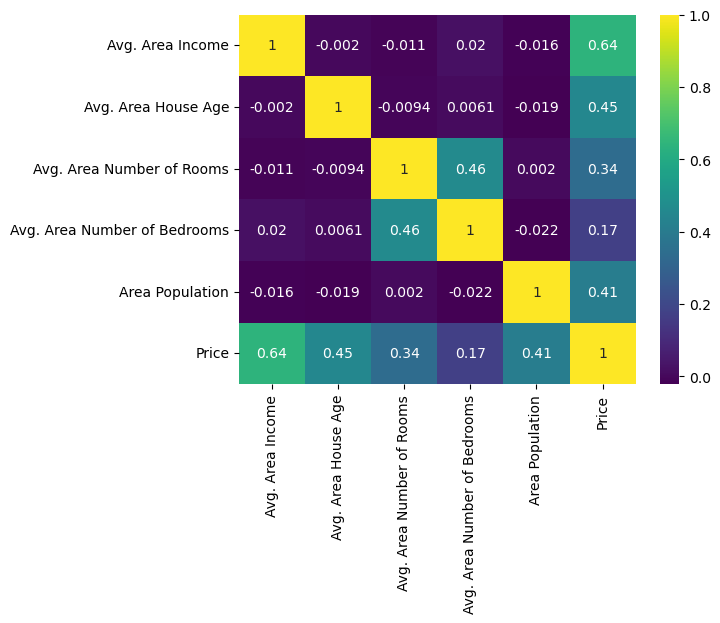

In [22]:
#..............CHECK FOR MULTICOLLINEARITY
sns.heatmap(df.corr(), annot = True, cmap = 'viridis')

In [23]:
feature = df.drop('Avg. Area Number of Bedrooms', axis = 1)

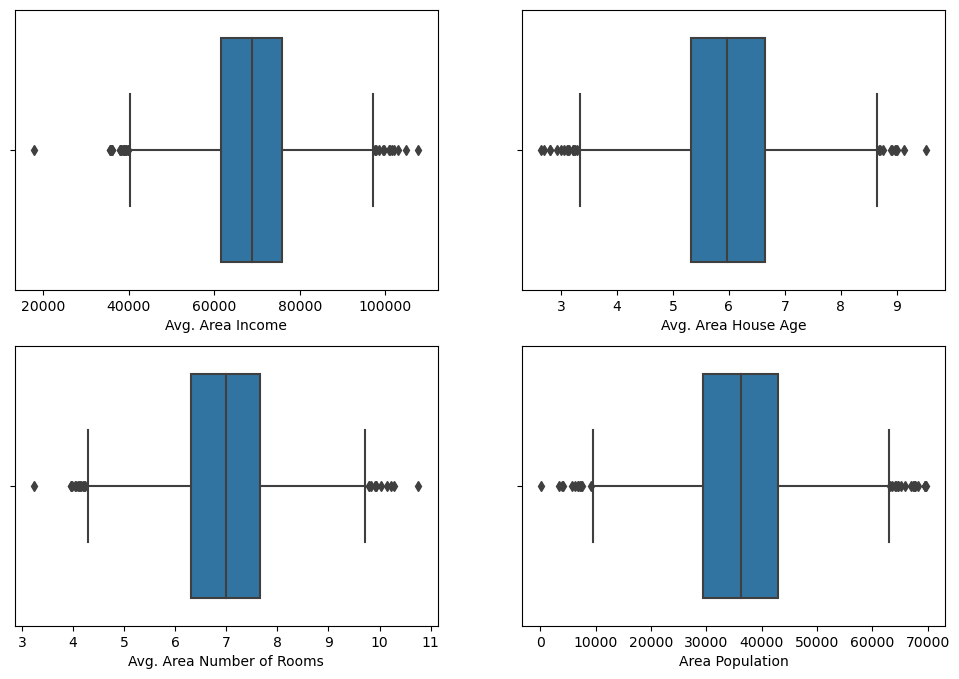

In [24]:
def outliercheck(dataframe,a,b,c,d):
    plt.figure(figsize = (12, 8))
    
    plt.subplot(2,2,1)
    sns.boxplot(x = dataframe[a])
    
    plt.subplot(2,2,2)
    sns.boxplot(x = dataframe[b])
    
    plt.subplot(2,2,3)
    sns.boxplot(x = dataframe[c])
    
    plt.subplot(2,2,4)
    sns.boxplot(x = dataframe[d])
    
outliercheck(feature, 'Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Area Population')

In [25]:
def outlierRemoval(dataframe):
    for i in dataframe.columns:
      if i in dataframe.select_dtypes(include = 'number').columns:
          Q1 = dataframe[i].describe()[4]  # Index 3 for Q1 (25th percentile)
          Q3 = dataframe[i].describe()[6]  # Index 7 for Q3 (75th percentile)
          IQR = Q3 - Q1
          lowerIQR = Q1 - 1.5 * IQR
          upperIQR = Q3 + 1.5 * IQR
          dataframe = dataframe.loc[(dataframe[i] >= lowerIQR) & (dataframe[i] <= upperIQR)]
    return dataframe

feature = outlierRemoval(feature)

In [26]:
feature.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4856 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Avg. Area Income           4856 non-null   float64
 1   Avg. Area House Age        4856 non-null   float64
 2   Avg. Area Number of Rooms  4856 non-null   float64
 3   Area Population            4856 non-null   float64
 4   Price                      4856 non-null   float64
dtypes: float64(5)
memory usage: 227.6 KB


In [27]:
#Split to train and test
x = feature.drop('Price', axis = 1)
y = feature.Price

xtrain,xtest,ytrain,ytest = train_test_split(x,y, test_size = 0.20, random_state = 40)

In [28]:
#.............VIEW SIZE........
print(f"The size of ytrain is: {ytrain.shape}")
print(f"The size of xtrain is: {xtrain.shape}")
print(f"The size of xtest is: {xtest.shape}")
print(f"The size of ytest is: {ytest.shape}")

The size of ytrain is: (3884,)
The size of xtrain is: (3884, 4)
The size of xtest is: (972, 4)
The size of ytest is: (972,)


In [29]:
#............VIEW DATASET
train_set = pd.concat([xtrain, ytrain], axis = 1).reset_index(drop = True)
test_set = pd.concat([xtest, ytest], axis = 1).reset_index(drop = True)

print("\t\t\t\t\t TRAIN SET")
display(train_set)
print(f"\t\t {train_set.shape}\n\n")

print("\t\t\t\t\t TEST SET")
display(test_set)
print(f"\t\t {test_set.shape}")

					 TRAIN SET


Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0         58655.854097             5.857894                   6.630832   
1         59167.635396             4.187032                   6.039378   
2         84268.224482             4.495821                   7.187602   
3         69351.477419             5.468523                   6.458905   
4         66006.179560             6.107908                   7.370411   
...                ...                  ...                        ...   
3879      64400.265086             5.270539                   8.404179   
3880      58334.705999             5.895957                   8.225443   
3881      48692.281958             5.201388                   7.424669   
3882      70844.205521             4.177214                   7.508958   
3883      79752.982221             8.515334                   7.365420   

      Area Population          Price  
0        40740.780151 1069851.161602  
1        39496.127562  631712.723781  
2        31182.388020 1257433.085605  
3        46833.131290 1410362.613092  
4        40691.238662 1367312.132053  
...               ...            ...  
3879     26605.375797 1110931.825702  
3880     23907.770993  965074.804744  
3881     40082.435997  836339.816946  
3882     33483.652480 1129388.122977  
3883     42127.949845 2045693.819749  

[3884 rows x 5 columns]

		 (3884, 5)


					 TEST SET


Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0        45353.130376             5.154345                   7.429265   
1        73433.626232             7.107789                   6.227752   
2        66690.972468             6.801246                   6.677087   
3        50241.373407             7.103037                   7.241313   
4        75759.489958             5.254822                   7.510712   
..                ...                  ...                        ...   
967      73225.066295             5.933499                   6.868604   
968      60658.648333             4.537630                   6.440243   
969      89030.561709             6.243065                   6.347262   
970      75690.695439             6.241329                   5.192788   
971      75865.634605             5.741840                   6.787658   

     Area Population          Price  
0       33340.288800  544320.688147  
1       44544.230459 1515005.384164  
2       22619.114641 1109006.287367  
3       53804.918290 1376146.811112  
4       46188.165092 1376637.505624  
..               ...            ...  
967     61830.539722 1796245.807906  
968     45004.970015  822685.374582  
969     61402.314998 2033546.784574  
970     46183.107365 1308243.922236  
971     30350.780859  975054.566401  

[972 rows x 5 columns]

		 (972, 5)


In [30]:
#..............MODELLING
from sklearn.preprocessing import StandardScaler

house = LinearRegression(fit_intercept=True)
scaler = StandardScaler()
xtrain_scaled = scaler.fit_transform(xtrain)
xtest_scaled = scaler.transform(xtest)

house.fit(xtrain_scaled, ytrain)

ytrain_predict = house.predict(xtrain_scaled)
train_score = r2(ytrain, ytrain_predict)

'''test set'''
ytest_predict = house.predict(xtest_scaled)
test_score = r2(ytest, ytest_predict)

In [31]:
#...........Print Cross valiation score
print(f"The accuracy score of Train set is: {train_score * 100 :.1f}%")
print(f"The accuracy score of Test set is: {test_score * 100 :.1f}%")

The accuracy score of Train set is: 91.1%
The accuracy score of Test set is: 91.1%


In [33]:
#use other metrics 
import numpy as np

def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
# Calculate MAPE for the test set
mape = mean_absolute_percentage_error(ytest, ytest_predict)
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")



# Calculate R-squared for the test set
r21 = r2(ytest, ytest_predict)
# Calculate the number of features (p)
p = xtest.shape[1]
# Calculate the number of data points (n)
n = len(ytest)
# Calculate Adjusted R-squared
adjusted_r2 = 1 - (1 - r21) * ((n - 1) / (n - p - 1))
print(f"Adjusted R-squared: {adjusted_r2:.2f}")


'''
Mean Absolute Percentage Error (MAPE):
MAPE calculates the percentage difference between the predicted and actual values, providing insight into the relative
error.
In the result, MAPE is approximately 7.44%. It means, on average, the model's predictions are off by about 7.44% of
the actual house prices.

Adjusted R-squared:
Adjusted R-squared is a modified version of R-squared that adjusts for the number of predictors in the model. It
accounts for model complexity.
In the result, Adjusted R-squared is approximately 0.91, which is quite high. It indicates that the model explains
about 91% of the variance in the target variable (Price) while adjusting for the number of features used.
'''


Mean Absolute Percentage Error (MAPE): 7.44%
Adjusted R-squared: 0.91


"\nMean Absolute Percentage Error (MAPE):\nMAPE calculates the percentage difference between the predicted and actual values, providing insight into the relative\nerror.\nIn the result, MAPE is approximately 7.44%. It means, on average, the model's predictions are off by about 7.44% of\nthe actual house prices.\n\nAdjusted R-squared:\nAdjusted R-squared is a modified version of R-squared that adjusts for the number of predictors in the model. It\naccounts for model complexity.\nIn the result, Adjusted R-squared is approximately 0.91, which is quite high. It indicates that the model explains\nabout 91% of the variance in the target variable (Price) while adjusting for the number of features used.\n"

In [34]:
#..........print difference
difference = pd.DataFrame({"Actual Value": ytest, "Predicted Value": ytest_predict, "difference": abs(ytest_predict - ytest)}).reset_index(drop = True)
difference

Actual Value  Predicted Value    difference
0    544320.688147    607162.225684  62841.537538
1   1515005.384164   1558451.047932  43445.663768
2   1109006.287367   1087110.300639  21895.986728
3   1376146.811112   1318926.556895  57220.254217
4   1376637.505624   1482059.726614 105422.220990
..             ...              ...           ...
967 1796245.807906   1697185.676736  99060.131169
968  822685.374582    891614.625323  68929.250741
969 2033546.784574   2019758.462499  13788.322075
970 1308243.922236   1364229.505612  55985.583376
971  975054.566401   1239628.791797 264574.225396

[972 rows x 3 columns]

In [35]:
#COEFFICIENT OF COLUMNS
for i in x:
    col_index = x.columns.get_loc(i)
    coefficient = house.coef_[col_index]
    print(f"The coefficient of {col_index} is: {coefficient :.3f}\n")
   
#INTECRPT OF PRICE 
print(f"The intercept of Price is: {house.intercept_ :.3f}")

The coefficient of 0 is: 222603.373

The coefficient of 1 is: 159095.835

The coefficient of 2 is: 118138.283

The coefficient of 3 is: 144411.935

The intercept of Price is: 1235241.857


Text(0.5, 1.0, 'Homoscedasticity Of Actual And Predicted Price')

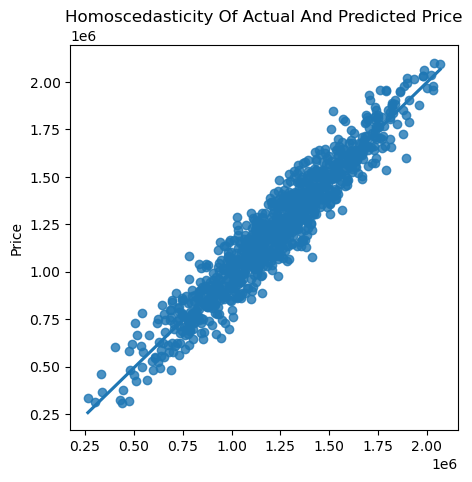

In [36]:
#......CHECK FOR HOMOSCEDASTICITY
plt.figure(figsize = (5,5))
sns.regplot(x = ytest_predict, y = ytest, ci = 0)
plt.title('Homoscedasticity Of Actual And Predicted Price')

Text(0.5, 1.0, 'Normal distribution of residuals')

<Figure size 500x500 with 0 Axes>

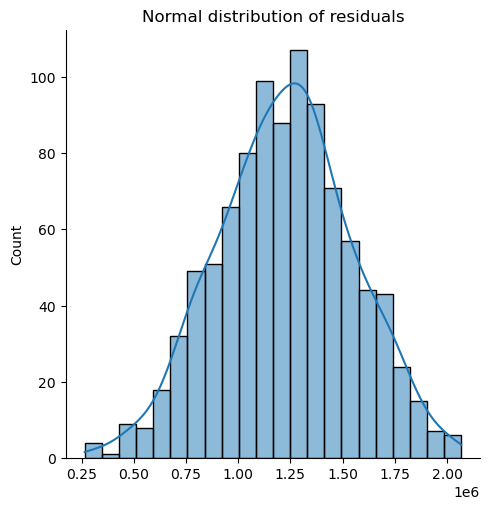

In [37]:
#ASSUMPTION OF NORMAL DISTRIBUTION OF RESIDUAL
plt.figure(figsize = (5,5))
sns.displot(x = ytest_predict, kde = True)
plt.title('Normal distribution of residuals')

In [38]:
#import model

import joblib

joblib.dump(house, 'house.pkl')

['house.pkl']